# Produzindo o modelo

Agora, vamos criar e treinar o nosso modelo de fato.

Vamos pegar os dados exportados na fase de análise

Vamos pegar a MLP desenvolvida

Vamos juntar tudo e fazer um modelo que reconhece comandos sonoros.

### Ler os dados coletados
e talvez realizar algum pré-processamento

In [1]:
import pandas as pd
import os
import subprocess

from funcoes import arquivo_mais_recente
from math import inf as infinito

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# pegar o CSV mais recente no diretório 'csv'
arquivo = arquivo_mais_recente('csv')
assert os.path.isfile(arquivo)

dataset = pd.read_csv(arquivo)

# fazendo um shuffle nos dados, pra ficar em ordem aleatória
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset.head()

,classe,f_centro_gravidade,f_fluxo_spectral,f_media
0,2,1787.310829,5.098251,0.050345
1,2,1794.176401,3.966945,0.053057
2,0,1385.895618,1.695399,0.129766
3,1,1763.078395,105.106328,0.281041
4,0,1381.969627,2.060081,0.132571


In [2]:
# tirando a coluna 'classe', fazendo standardization e convertendo para matriz
dados_normalizados = (dataset-dataset.mean()) / dataset.std()
dados = dados_normalizados.loc[:, dados_normalizados.columns != 'classe'].as_matrix()

labels = dataset['classe'].as_matrix()

### Configurando o modelo

In [3]:
# quantidade de neurônios na camada de entrada
tam_entrada = len(dados[0])

# quantidade de neurônios na camada de saída
tam_saida = len(set(labels))

# Quantos neurônios tem em cada camada (sem contar o bias)
formato_rede = [tam_entrada, tam_saida, tam_saida]

# Variação mínima do erro como critério de parada
delta_erro_minimo = 0.00001

# Número máximo de iterações
max_iteracoes = 10000

In [4]:
# atualizando o código dentro de MLP.py, que é extraído de MLP.ipynb
subprocess.Popen(['ipython', 'nbconvert', '--to=python', 'MLP.ipynb'])

from MLP import *

### Treinamento

In [5]:
rede = gerar_rede(formato_rede)

erro_anterior = infinito

for _ in range(max_iteracoes):
    erros = []

    for dado in range(len(dados)):
        # Atualizar os pesos: joga dados[dado] na entrada, e propaga o erro
        # pra ajustar os pesos
        rede = forward_backward(rede, dados[dado], one_hot(labels[dado], tam_saida))

        # com os novos pesos, vamos ver o que ele prediz
        I, Y = forward(rede, dados[dado])
        d = one_hot(labels[dado], tam_saida)

        # vamos guardar o erro entre o que ele previu e o que é pra ser
        erros.append(erro_total(Y[-1], d))

    # erro médio
    erro = sum(erros)/len(erros)
    
    if _ == 0:
        print("erro inicial: ", erro)
        
    if _ % (max_iteracoes / 10) == 0:
        print("erro medio: ", erro)
        
    if abs(erro - erro_anterior) <= delta_erro_minimo:
        break
        
    erro_anterior = erro
        
print("\nerro final: ",erro)

erro inicial:  0.5207093173004098
erro medio:  0.5207093173004098

erro final:  0.0015948156828097387


### Testes

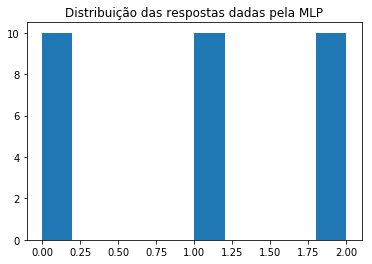

Acertou 100.0 %


In [6]:
certos = 0
errados = 0

resultados = []

for i in range(len(dados)):
    # vamos ver o que ele prediz
    resultado = predizer(rede, dados[i])
    resultados.append(resultado)
    if resultado == labels[i]:
        certos +=1
    else:
        errados +=1

plt.hist(resultados)
plt.title("Distribuição das respostas dadas pela MLP")
plt.show()

print("Acertou %.1f %%" % (100*certos / (certos + errados)))

